## 2. Normalização e Dimensionalidade dos Embeddings

### 2.1 Normalização de Vetores

**Por que normalizar embeddings?**
A normalização é crucial em embeddings porque:
- **Elimina bias de magnitude**: Vetores com valores absolutos maiores não dominam o cálculo de similaridade
- **Melhora performance**: Algoritmos convergem mais rapidamente
- **Padroniza escalas**: Diferentes features ficam na mesma escala
- **Facilita comparações**: Similaridade cosseno se torna mais interpretável

In [4]:
import numpy as np

class EmbeddingNormalizer:
    @staticmethod
    def l2_normalize(embedding):
        """
        Normalização L2 (norma euclidiana)
        
        Fórmula: x_norm = x / ||x||₂
        
        - Transforma o vetor para ter norma (magnitude) = 1
        - Preserva a direção do vetor original
        - Ideal para cálculo de similaridade cosseno
        - Mais comum em embeddings de texto
        """
        return embedding / np.linalg.norm(embedding)
    
    @staticmethod
    def min_max_normalize(embedding):
        """
        Normalização Min-Max
        
        Fórmula: x_norm = (x - min(x)) / (max(x) - min(x))
        
        - Escala valores para o intervalo [0, 1]
        - Preserva a distribuição original dos dados
        - Sensível a outliers
        - Útil quando você conhece os limites dos dados
        """
        return (embedding - embedding.min()) / (embedding.max() - embedding.min())
    
    @staticmethod
    def z_score_normalize(embedding):
        """
        Normalização Z-Score (Standardização)
        
        Fórmula: x_norm = (x - μ) / σ
        
        - Centraliza dados em média = 0, desvio padrão = 1
        - Assume distribuição normal dos dados
        - Robusta a outliers moderados
        - Preserva a forma da distribuição original
        """
        return (embedding - embedding.mean()) / embedding.std()

# Exemplo prático com interpretação educacional
embedding_raw = np.array([1.5, -0.8, 2.3, -1.2, 0.9])
normalizer = EmbeddingNormalizer()

embedding_l2 = normalizer.l2_normalize(embedding_raw)
embedding_minmax = normalizer.min_max_normalize(embedding_raw)
embedding_zscore = normalizer.z_score_normalize(embedding_raw)

print("=== COMPARAÇÃO DE TÉCNICAS DE NORMALIZAÇÃO ===")
print(f"Original: {embedding_raw}")
print(f"Norma original: {np.linalg.norm(embedding_raw):.3f}")
print()

print(f"L2 Normalizado: {embedding_l2}")
print(f"Nova norma: {np.linalg.norm(embedding_l2):.3f} (sempre = 1.0)")
print()

print(f"Min-Max Normalizado: {embedding_minmax}")
print(f"Min: {embedding_minmax.min():.3f}, Max: {embedding_minmax.max():.3f}")
print()

print(f"Z-Score Normalizado: {embedding_zscore}")
print(f"Média: {embedding_zscore.mean():.3f}, Std: {embedding_zscore.std():.3f}")

# Demonstração prática: impacto na similaridade cosseno
print("\n=== IMPACTO NA SIMILARIDADE COSSENO ===")
embedding_a = np.array([1.0, 2.0, 3.0])
embedding_b = np.array([10.0, 20.0, 30.0])  # Mesmo padrão, escala diferente

from sklearn.metrics.pairwise import cosine_similarity

# Sem normalização
sim_original = cosine_similarity([embedding_a], [embedding_b])[0][0]
print(f"Similaridade sem normalização: {sim_original:.3f}")

# Com normalização L2
a_norm = normalizer.l2_normalize(embedding_a)
b_norm = normalizer.l2_normalize(embedding_b)
sim_normalized = cosine_similarity([a_norm], [b_norm])[0][0]
print(f"Similaridade com normalização L2: {sim_normalized:.3f}")
print("✓ Vetores com mesmo padrão têm similaridade = 1.0 após normalização L2")

=== COMPARAÇÃO DE TÉCNICAS DE NORMALIZAÇÃO ===
Original: [ 1.5 -0.8  2.3 -1.2  0.9]
Norma original: 3.230

L2 Normalizado: [ 0.46446084 -0.24771245  0.71217329 -0.37156867  0.27867651]
Nova norma: 1.000 (sempre = 1.0)

Min-Max Normalizado: [0.77142857 0.11428571 1.         0.         0.6       ]
Min: 0.000, Max: 1.000

Z-Score Normalizado: [ 0.71665742 -1.00033432  1.31387194 -1.29894158  0.26874653]
Média: -0.000, Std: 1.000

=== IMPACTO NA SIMILARIDADE COSSENO ===
Similaridade sem normalização: 1.000
Similaridade com normalização L2: 1.000
✓ Vetores com mesmo padrão têm similaridade = 1.0 após normalização L2


### 2.2 Redução de Dimensionalidade

**Por que reduzir dimensionalidade?**
- **Visualização**: Impossível visualizar espaços com >3 dimensões
- **Performance**: Menos dimensões = processamento mais rápido
- **Armazenamento**: Reduz uso de memória
- **Curse of dimensionality**: Evita problemas em espaços de alta dimensão
- **Noise reduction**: Remove dimensões menos informativas

🎓 DEMONSTRAÇÃO: PCA vs t-SNE - Comparação Educacional

📊 DATASET 1: CLUSTERS LINEARES
----------------------------------------
Dados lineares: 45 amostras, 50 dimensões

📊 DATASET 2: CLUSTERS NÃO-LINEARES
----------------------------------------
Dados não-lineares: 45 amostras, 50 dimensões

🔬 TESTE EM DADOS LINEARES

--- PCA em dados lineares ---
PCA - Variância explicada por componente: [0.43449753 0.19833051]
Variância total preservada: 0.633

--- t-SNE em dados lineares ---
t-SNE usando perplexity: 30

🔬 TESTE EM DADOS NÃO-LINEARES

--- PCA em dados não-lineares ---
PCA - Variância explicada por componente: [0.36286366 0.34136237]
Variância total preservada: 0.704

--- t-SNE em dados não-lineares ---
t-SNE usando perplexity: 30

📊 VISUALIZAÇÕES COMPARATIVAS


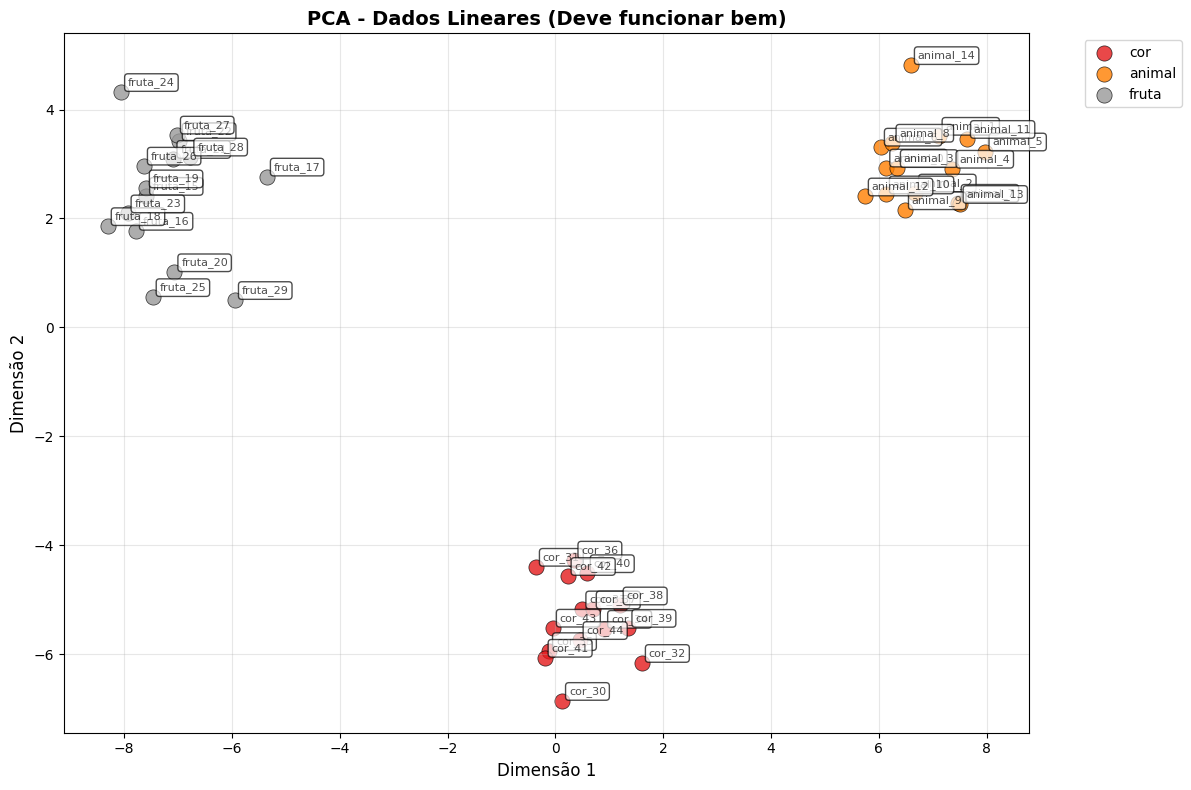

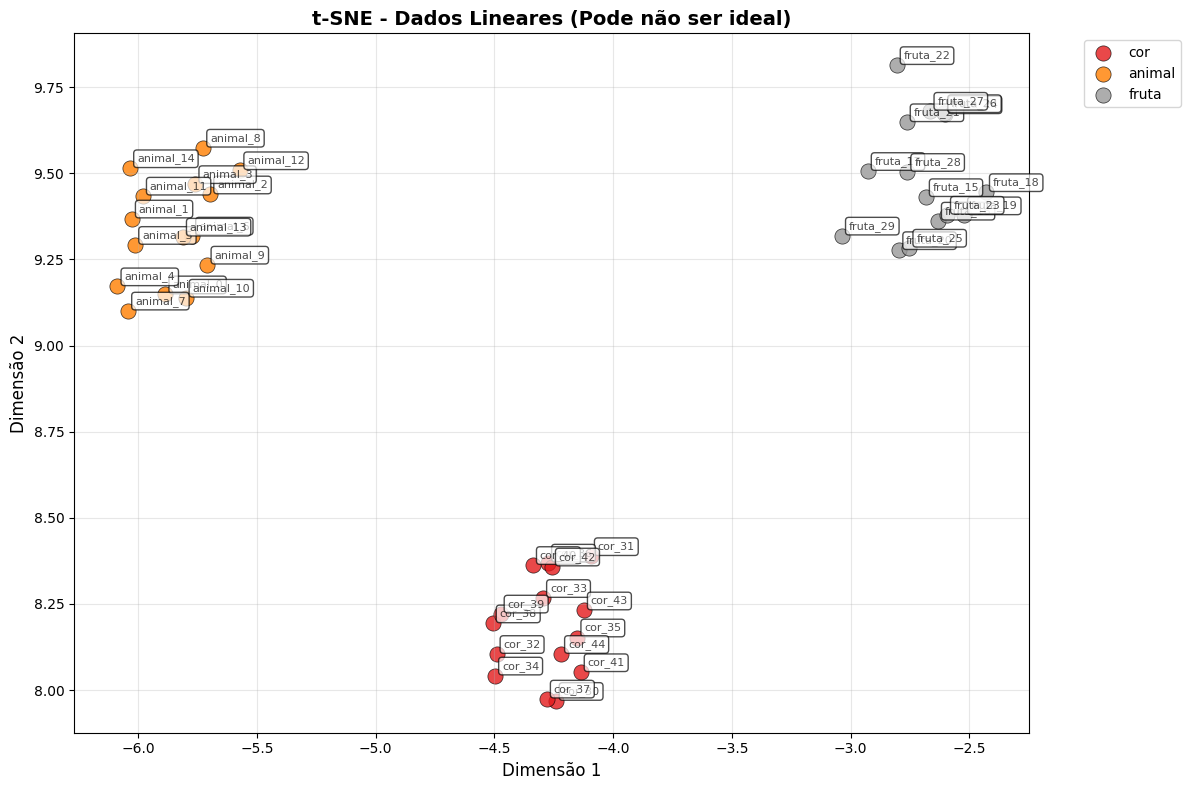

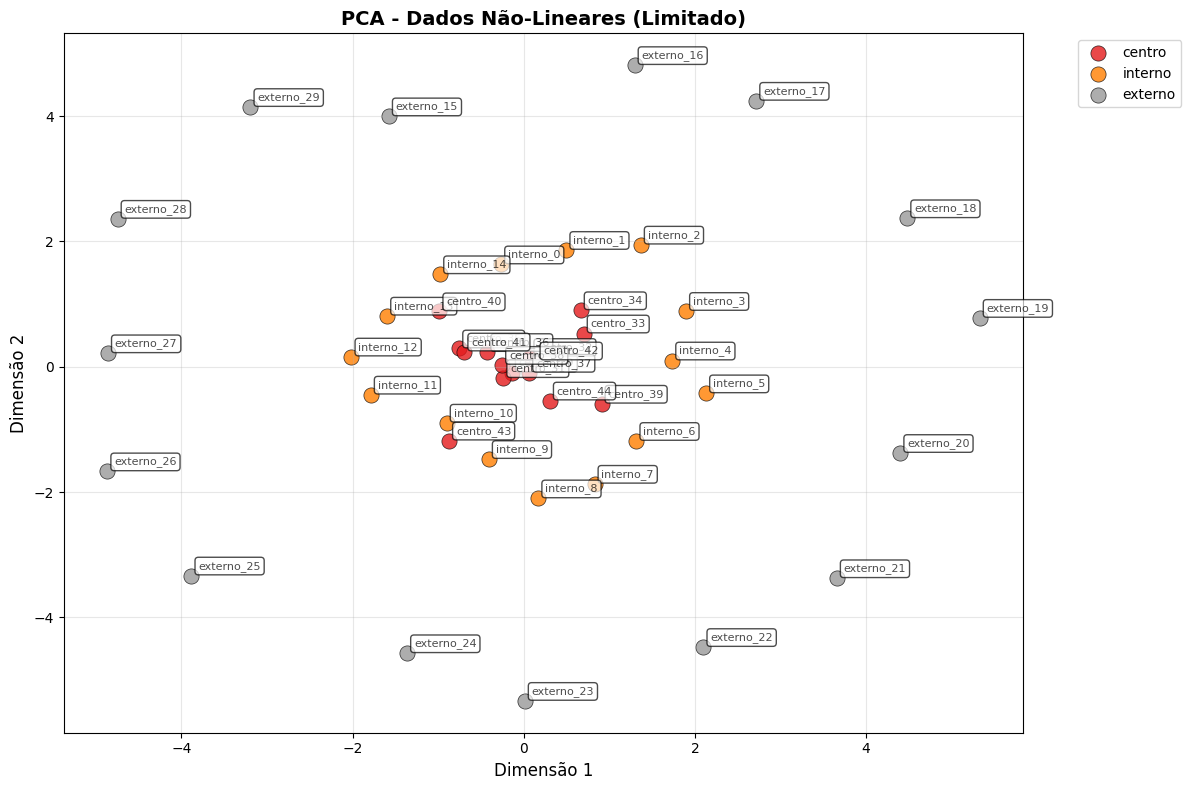

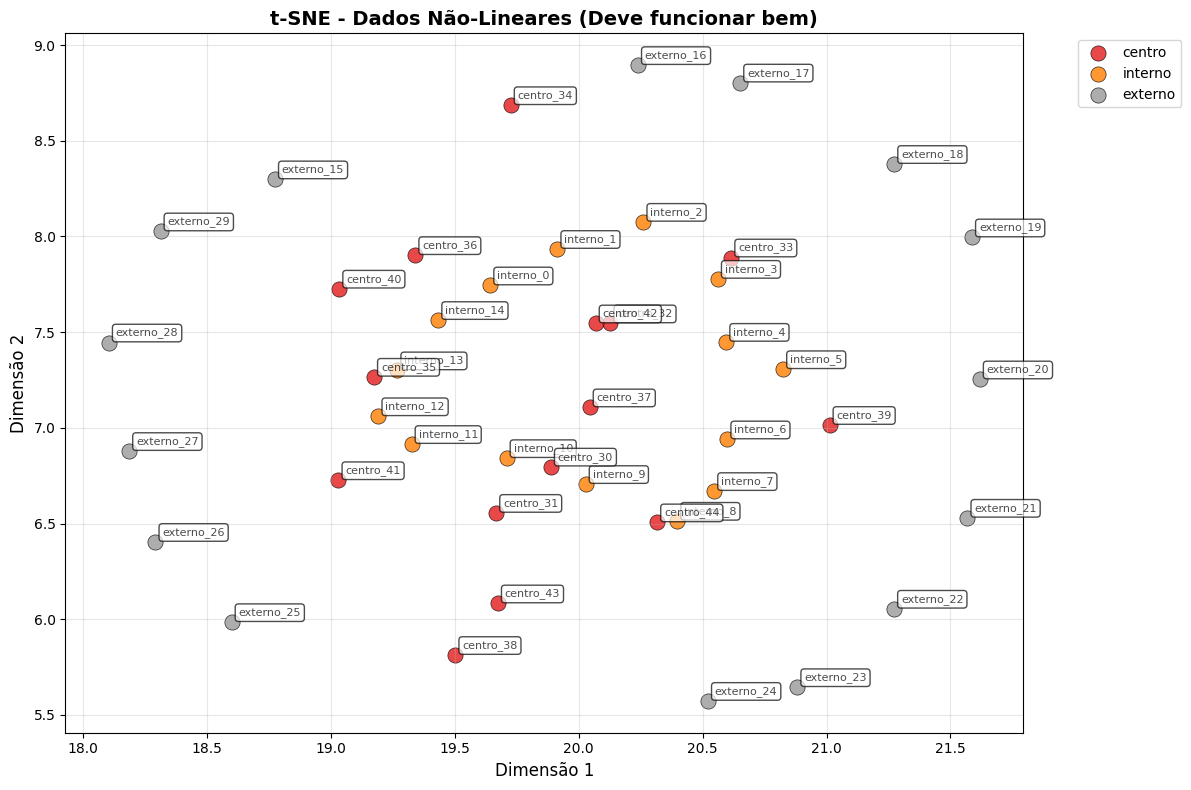

In [6]:

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

class DimensionalityReducer:
    def __init__(self):
        self.pca = None
        self.tsne = None
    
    def reduce_with_pca(self, embeddings, n_components=2):
        """
        Redução usando PCA (Principal Component Analysis)
        
        Características:
        - Linear: Encontra combinações lineares das features originais
        - Preserva variância: Mantém a maior variância possível
        - Determinístico: Sempre produz o mesmo resultado
        - Rápido: Computacionalmente eficiente
        - Interpretável: Componentes têm significado matemático claro
        
        Quando usar:
        - Dados com correlações lineares
        - Quando você precisa de resultados reproduzíveis
        - Para análise exploratória inicial
        - Quando os clusters são bem separados linearmente
        """
        self.pca = PCA(n_components=n_components)
        reduced = self.pca.fit_transform(embeddings)
        
        # Informações educacionais
        explained_variance = self.pca.explained_variance_ratio_
        print(f"PCA - Variância explicada por componente: {explained_variance}")
        print(f"Variância total preservada: {sum(explained_variance):.3f}")
        
        return reduced
    
    def reduce_with_tsne(self, embeddings, n_components=2, perplexity=None):
        """
        Redução usando t-SNE (t-Distributed Stochastic Neighbor Embedding)
        
        Características:
        - Não-linear: Captura relações complexas
        - Preserva vizinhança local: Pontos próximos ficam próximos
        - Estocástico: Resultados podem variar entre execuções
        - Lento: Computacionalmente intensivo
        - Excelente para visualização de clusters complexos
        
        Quando usar:
        - Visualização de dados complexos e não-lineares
        - Identificação de clusters em dados de alta dimensão
        - Quando relações são não-lineares
        - Dados com muitas amostras (>50)
        
        Cuidados:
        - Distâncias globais não são preservadas
        - Não use para análise quantitativa de distâncias
        - Ajuste perplexity baseado no tamanho dos dados
        """
        # Ajustar perplexity automaticamente se não fornecida
        if perplexity is None:
            # Regra prática: perplexity entre 5 e 50, ideal ~30
            # Para datasets pequenos, usar valor menor
            n_samples = len(embeddings)
            if n_samples < 30:
                perplexity = max(3, n_samples // 3)
            else:
                perplexity = min(30, n_samples - 1)
        
        print(f"t-SNE usando perplexity: {perplexity}")
        
        self.tsne = TSNE(
            n_components=n_components, 
            random_state=42,
            perplexity=perplexity,
            learning_rate='auto'
        )
        return self.tsne.fit_transform(embeddings)
    
    def plot_embeddings(self, embeddings_2d, labels=None, title="Visualização de Embeddings"):
        """
        Visualização dos embeddings reduzidos com melhorias
        
        Parâmetros:
        - embeddings_2d: Array com embeddings reduzidos para 2D
        - labels: Labels opcionais para anotar pontos
        - title: Título do gráfico
        """
        plt.figure(figsize=(12, 8))
        
        # Colorir pontos se houver labels repetidos (clusters)
        if labels:
            unique_labels = list(set(labels))
            colors = plt.cm.Set1(np.linspace(0, 1, len(unique_labels)))
            
            for i, label in enumerate(unique_labels):
                mask = np.array([l == label for l in labels])
                plt.scatter(embeddings_2d[mask, 0], embeddings_2d[mask, 1], 
                          c=[colors[i]], label=label, alpha=0.8, s=120, edgecolors='black', linewidth=0.5)
        else:
            plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], 
                       alpha=0.7, s=100, c='blue')
        
        # Anotar pontos com melhor posicionamento
        if labels:
            for i, label in enumerate(labels):
                plt.annotate(f"{label}_{i}", (embeddings_2d[i, 0], embeddings_2d[i, 1]),
                           xytext=(5, 5), textcoords='offset points',
                           fontsize=8, alpha=0.7, 
                           bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))
        
        plt.title(title, fontsize=14, fontweight='bold')
        plt.xlabel("Dimensão 1", fontsize=12)
        plt.ylabel("Dimensão 2", fontsize=12)
        plt.grid(True, alpha=0.3)
        
        if labels and len(set(labels)) > 1:
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.tight_layout()
        plt.show()

# Exemplo prático educacional CORRIGIDO
def exemplo_reducao_dimensionalidade():
    """
    Exemplo completo comparando PCA vs t-SNE com dados mais realistas
    
    🎯 Objetivos educacionais:
    1. Mostrar quando PCA funciona melhor (dados lineares)
    2. Mostrar quando t-SNE funciona melhor (dados não-lineares)
    3. Demonstrar a importância dos parâmetros
    """
    
    print("=" * 70)
    print("🎓 DEMONSTRAÇÃO: PCA vs t-SNE - Comparação Educacional")
    print("=" * 70)
    
    # Criar DOIS conjuntos de dados para comparação
    np.random.seed(42)
    
    # === DATASET 1: CLUSTERS LINEARES (PCA deve funcionar melhor) ===
    print("\n📊 DATASET 1: CLUSTERS LINEARES")
    print("-" * 40)
    
    # Criar centros bem separados em alta dimensão
    n_dims = 50
    centro_animais = np.zeros(n_dims)
    centro_animais[:10] = np.random.normal(3, 0.5, 10)  # Variação em múltiplas dimensões
    
    centro_frutas = np.zeros(n_dims)
    centro_frutas[10:20] = np.random.normal(-3, 0.5, 10)
    
    centro_cores = np.zeros(n_dims)
    centro_cores[20:30] = np.random.normal(0, 0.5, 10)
    
    # Gerar amostras com mais variabilidade
    n_samples = 15  # Mais amostras por cluster
    animais_linear = np.random.normal(centro_animais, 0.8, (n_samples, n_dims))
    frutas_linear = np.random.normal(centro_frutas, 0.8, (n_samples, n_dims))
    cores_linear = np.random.normal(centro_cores, 0.8, (n_samples, n_dims))
    
    embeddings_linear = np.vstack([animais_linear, frutas_linear, cores_linear])
    labels_linear = (['animal'] * n_samples + ['fruta'] * n_samples + ['cor'] * n_samples)
    
    print(f"Dados lineares: {embeddings_linear.shape[0]} amostras, {embeddings_linear.shape[1]} dimensões")
    
    # === DATASET 2: CLUSTERS NÃO-LINEARES (t-SNE deve funcionar melhor) ===
    print("\n📊 DATASET 2: CLUSTERS NÃO-LINEARES")
    print("-" * 40)
    
    # Criar estruturas não-lineares (círculos concêntricos em alta dimensão)
    def create_nonlinear_clusters(n_samples_per_cluster=20, n_dims=50):
        """Cria clusters em formato de círculos concêntricos"""
        clusters = []
        
        # Cluster 1: círculo interno
        angles = np.linspace(0, 2*np.pi, n_samples_per_cluster, endpoint=False)
        radius = 2
        cluster1 = np.zeros((n_samples_per_cluster, n_dims))
        cluster1[:, 0] = radius * np.cos(angles) + np.random.normal(0, 0.2, n_samples_per_cluster)
        cluster1[:, 1] = radius * np.sin(angles) + np.random.normal(0, 0.2, n_samples_per_cluster)
        cluster1[:, 2:] = np.random.normal(0, 0.1, (n_samples_per_cluster, n_dims-2))
        
        # Cluster 2: círculo externo
        radius = 5
        cluster2 = np.zeros((n_samples_per_cluster, n_dims))
        cluster2[:, 0] = radius * np.cos(angles) + np.random.normal(0, 0.3, n_samples_per_cluster)
        cluster2[:, 1] = radius * np.sin(angles) + np.random.normal(0, 0.3, n_samples_per_cluster)
        cluster2[:, 2:] = np.random.normal(0, 0.1, (n_samples_per_cluster, n_dims-2))
        
        # Cluster 3: centro
        cluster3 = np.random.normal(0, 0.5, (n_samples_per_cluster, n_dims))
        
        return cluster1, cluster2, cluster3
    
    cluster1, cluster2, cluster3 = create_nonlinear_clusters(n_samples, n_dims)
    embeddings_nonlinear = np.vstack([cluster1, cluster2, cluster3])
    labels_nonlinear = (['interno'] * n_samples + ['externo'] * n_samples + ['centro'] * n_samples)
    
    print(f"Dados não-lineares: {embeddings_nonlinear.shape[0]} amostras, {embeddings_nonlinear.shape[1]} dimensões")
    
    # === COMPARAÇÃO DOS ALGORITMOS ===
    reducer = DimensionalityReducer()
    
    # Testar em dados LINEARES
    print(f"\n{'='*50}")
    print("🔬 TESTE EM DADOS LINEARES")
    print('='*50)
    
    print("\n--- PCA em dados lineares ---")
    pca_linear = reducer.reduce_with_pca(embeddings_linear, n_components=2)
    
    print("\n--- t-SNE em dados lineares ---")
    tsne_linear = reducer.reduce_with_tsne(embeddings_linear, n_components=2)
    
    # Testar em dados NÃO-LINEARES
    print(f"\n{'='*50}")
    print("🔬 TESTE EM DADOS NÃO-LINEARES")
    print('='*50)
    
    print("\n--- PCA em dados não-lineares ---")
    pca_nonlinear = reducer.reduce_with_pca(embeddings_nonlinear, n_components=2)
    
    print("\n--- t-SNE em dados não-lineares ---")
    tsne_nonlinear = reducer.reduce_with_tsne(embeddings_nonlinear, n_components=2)
    
    # === VISUALIZAÇÕES COMPARATIVAS ===
    print(f"\n{'='*50}")
    print("📊 VISUALIZAÇÕES COMPARATIVAS")
    print('='*50)
    
    # Dados lineares
    reducer.plot_embeddings(pca_linear, labels_linear, 
                          "PCA - Dados Lineares (Deve funcionar bem)")
    reducer.plot_embeddings(tsne_linear, labels_linear, 
                          "t-SNE - Dados Lineares (Pode não ser ideal)")
    
    # Dados não-lineares
    reducer.plot_embeddings(pca_nonlinear, labels_nonlinear, 
                          "PCA - Dados Não-Lineares (Limitado)")
    reducer.plot_embeddings(tsne_nonlinear, labels_nonlinear, 
                          "t-SNE - Dados Não-Lineares (Deve funcionar bem)")
    
    # === ANÁLISE EDUCACIONAL ===
    print(f"\n{'='*70}")

# Executar exemplo corrigido
exemplo_reducao_dimensionalidade()

### 🎓 **Pontos-chave:**

1. **Normalização é fundamental**: Sempre normalize embeddings antes de calcular similaridades
2. **L2 é padrão**: Para embeddings de texto, normalização L2 é quase sempre a melhor escolha
3. **PCA vs t-SNE**: PCA para análise quantitativa, t-SNE para visualização de clusters
4. **Interpretação cuidadosa**: t-SNE pode criar clusters visuais que não existem nos dados originais
5. **Experimentação**: Teste diferentes técnicas para encontrar a melhor para seus dados